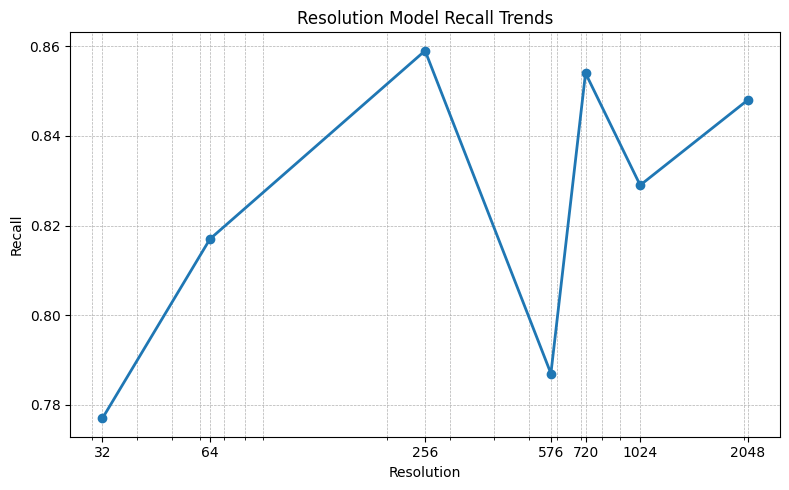

In [ ]:
import matplotlib.pyplot as plt

# Data
eval_precision = [0.777, 0.817, 0.859, 0.787, 0.854, 0.829, 0.848]
x_labels = [32, 64, 256, 576, 720, 1024, 2048]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_labels, eval_precision, marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title("Resolution Model Precision Trends")
plt.xlabel("Resolution")
plt.ylabel("Recall")
plt.xscale('log')  # Set the X-axis to a logarithmic scale
plt.xticks(x_labels, labels=x_labels)  # Ensure correct labels on log scale
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()


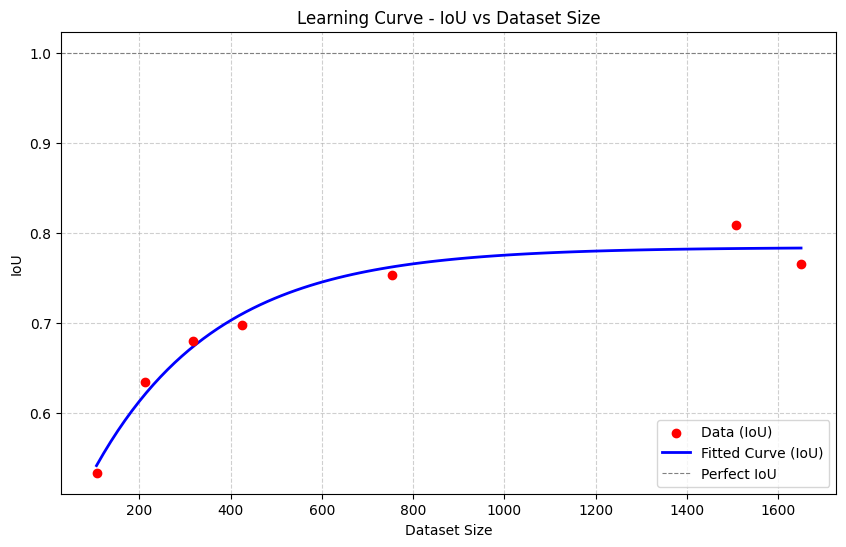

Fitted parameters: a=0.3593, b=268.6852, c=0.4247


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data points from the provided tables
sizes = np.array([106, 212, 318, 424, 754, 1508, 1650])
iou_values = np.array([0.534, 0.635, 0.680, 0.698, 0.753, 0.809, 0.766])

# Define the learning curve model
def learn_curve(x, a, b, c):
    return a * (1 - np.exp(-x / b)) + c

# Fit the model and predict
params, _ = curve_fit(learn_curve, sizes, iou_values, p0=[1.0, 1000, 0.5])
x_pred = np.linspace(min(sizes), max(sizes), 100)
y_pred = learn_curve(x_pred, *params)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(sizes, iou_values, color='red', label="Data (IoU)", zorder=3)
plt.plot(x_pred, y_pred, label="Fitted Curve (IoU)", color='blue', linewidth=2)
plt.axhline(1.0, color='gray', linestyle='--', linewidth=0.8, label="Perfect IoU")
plt.title("Learning Curve - IoU vs Dataset Size")
plt.xlabel("Dataset Size")
plt.ylabel("IoU")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print fitted parameters
print(f"Fitted parameters: a={params[0]:.4f}, b={params[1]:.4f}, c={params[2]:.4f}")
